<a href="https://colab.research.google.com/github/mohmaed7777/K-means-for-clustering-the-Stars-Typs/blob/main/Clustering_Stars_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set()
print('<===============Setup is Done===================>')

<===============Setup is Done===================>


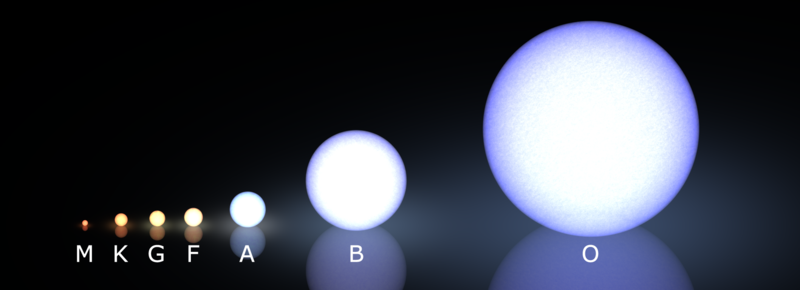

Temperature -- K

L -- L/Lo

R -- R/Ro

AM -- Mv

Color -- General Color of Spectrum

Spectral_Class -- O,B,A,F,G,K,M / SMASS
 - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants



from 0 to 5

**-Red Dwarf - 0**

**-Brown Dwarf - 1**

**-White Dwarf - 2**

**-Main Sequence - 3**

**-Super Giants - 4**

**-Hyper Giants - 5**


In [2]:
data = pd.read_csv('/content/Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [5]:
data.head().T

,0,1,2,3,4
Temperature,3068,3042,2600,2800,1939
L,0.0024,0.0005,0.0003,0.0002,0.000138
R,0.17,0.1542,0.102,0.16,0.103
A_M,16.12,16.6,18.7,16.65,20.06
Color,Red,Red,Red,Red,Red
Spectral_Class,M,M,M,M,M


#**Explorotary Data Analysis:-**

**1- Dropout unwanted Column:-**

In [3]:
data.drop(['Type'], axis=1, inplace=True)

**2-Determine Unique Values in the DataFrame:-**

In [6]:
data.nunique()

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
dtype: int64

**3- Get Info About the Data:-**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB


**4-Checkout How many missing values Do we have?:-**

In [8]:

data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64

**5-Counts of unique values:-**

In [9]:
 data.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
yellowish               2
Whitish                 2
Orange                  2
Pale yellow orange      1
White-Yellow            1
Blue-White              1
Yellowish               1
Orange-Red              1
Name: Color, dtype: int64

In [10]:

data.Spectral_Class.value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

**6- Bar Plot to Show Tempreture Level among Spectral Class & Colors:-**

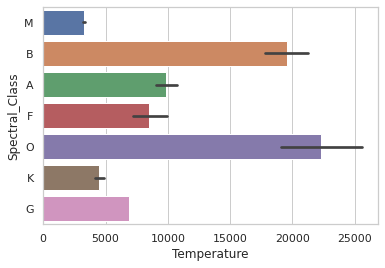

In [11]:
# Set theme
sns.set_style('whitegrid')
 
# BarChart
sns.barplot(x='Temperature', y='Spectral_Class', data=data)

**7- Categorical Data Desriptions:-**

In [12]:
data.describe(include='object')

,Color,Spectral_Class
count,240,240
unique,17,7
top,Red,M
freq,112,111


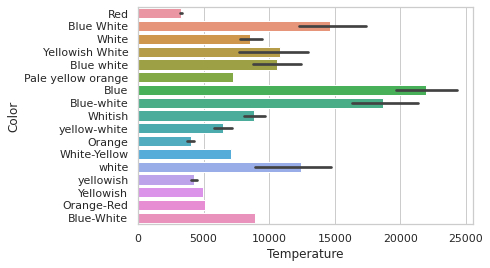

In [13]:
sns.barplot(x='Temperature', y='Color', data=data)

**8-Numarical Data Description:-**

In [14]:
data.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


**9- Transform Categorical Features Into Numaric type:-**

In [15]:
df_uniques = data.nunique()


In [22]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=20)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Color', 'Spectral_Class']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lebel_encoder = LabelEncoder()

In [25]:
for col in categorical_vals:
  data[col] = lebel_encoder.fit_transform(data[col])


**10-Read The Data After Encoding:-**

In [26]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,8,5
1,3042,0.000500,0.1542,16.60,8,5
2,2600,0.000300,0.1020,18.70,8,5
3,2800,0.000200,0.1600,16.65,8,5
4,1939,0.000138,0.1030,20.06,8,5


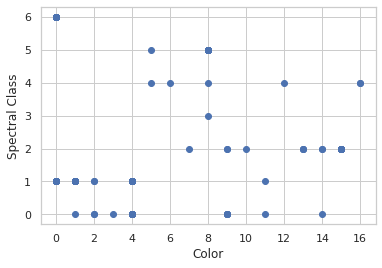

In [33]:
# Before Clustering : 
plt.scatter(data['Color'], data['Spectral_Class'])
plt.xlabel('Color')
plt.ylabel('Spectral Class')
plt.show()

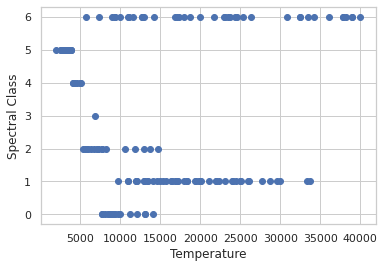

In [34]:
# Before Clustering : 
plt.scatter(data['Temperature'], data['Spectral_Class'])
plt.xlabel('Temperature')
plt.ylabel('Spectral Class')
plt.show()


In [35]:
data.corr()

,Temperature,L,R,A_M,Color,Spectral_Class
Temperature,1.000000,0.393404,0.064216,-0.420261,-0.680107,-0.207852
L,0.393404,1.000000,0.526516,-0.692619,-0.379181,0.275280
R,0.064216,0.526516,1.000000,-0.608728,-0.011242,0.097124
A_M,-0.420261,-0.692619,-0.608728,1.000000,0.328318,-0.085840
Color,-0.680107,-0.379181,-0.011242,0.328318,1.000000,0.018774
Spectral_Class,-0.207852,0.275280,0.097124,-0.085840,0.018774,1.000000


In [ ]:
# Declare feature vector and target variable : 
X = data
y = data['Spectral_Class']

In [ ]:
# Feature Scaling : 
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max = MinMaxScaler()

In [ ]:
X = min_max.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,0.029663,2.731275e-09,0.000083,0.876798,0.5,0.833333
1,0.028980,4.944550e-10,0.000075,0.891807,0.5,0.833333
2,0.017367,2.590003e-10,0.000048,0.957473,0.5,0.833333
3,0.022622,1.412729e-10,0.000078,0.893371,0.5,0.833333
4,0.000000,6.828189e-11,0.000049,1.000000,0.5,0.833333


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
# Kmeans model with K=2 :- 

K_model = KMeans(n_clusters=2, random_state=0)
K_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# K-means model parameters study:-
K_model.cluster_centers_

array([[3.39878518e-01, 3.50545776e-01, 3.38768220e-01, 1.30006036e-01,
        2.26744186e-01, 8.06201550e-01],
       [1.60631584e-01, 9.00505830e-04, 4.94444843e-04, 7.21843604e-01,
        4.35064935e-01, 5.25974026e-01]])

In [ ]:
pred = K_model.fit_predict(X)
pred

array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  2,  2,  2,  2,  2,  2, 11,
        2,  2,  2,  5, 17,  1, 17, 16, 23, 16, 23, 23,  1, 10, 15,  7, 18,
       18, 17, 18, 18, 18, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  3,
        3,  3, 14,  3,  3,  3,  3,  3,  3, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1, 17,  5, 16,
       16, 16, 16, 23,  5, 18,  9,  9,  9,  7,  7,  2, 18,  7, 10, 24, 13,
       19, 19,  4,  4, 19,  4, 19, 10,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  2,  2,  2,  2,  2, 11,
        2,  2,  2,  2, 16,  5,  5, 16, 16, 16, 16, 23, 17, 16, 15,  7,  7,
        7, 15, 15, 15, 15,  7, 10, 19,  4,  4,  4,  4,  4, 19, 19,  4,  4,
        3,  3, 14, 12,  3,  3, 19, 12,  7, 12, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11,  2,  2,  2,  2,  2,  2,  2, 11,  2, 11,  5, 16, 16, 16,
        5,  5,  5,  5,  5,  5, 15,  7,  7, 15, 10, 10,  7, 15,  7, 18, 19,
        4,  4, 20,  4, 19

In [ ]:
# Get the inertia: 
K_model.inertia_

73.12281981437509

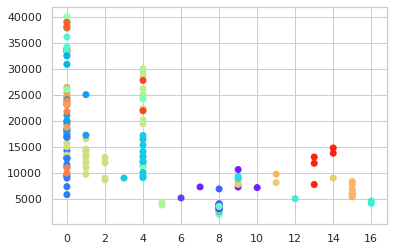

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = pred 
plt.scatter(data_with_clusters['Color'],data_with_clusters['Temperature'],c=data_with_clusters['Clusters'],cmap='rainbow')

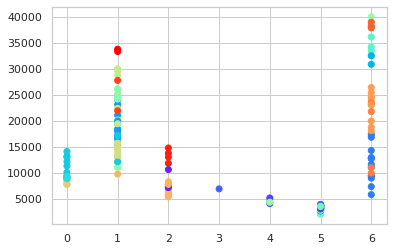

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = pred 
plt.scatter(data_with_clusters['Spectral_Class'],data_with_clusters['Temperature'],c=data_with_clusters['Clusters'],cmap='rainbow')